In [1]:
# import the necessary packages
# this ipynb doesn't use all these libraries, but some may come in handy
# when running some spatial analysis further along the line
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import xlrd
import requests
import datetime
import csv
#import mapclassify
#import pysal 
#import libpysal as lp
#import shapely.geometry 
#import mapclassify as mc
#import numpy as np
#import esda
#import seaborn as sbn

In [2]:
# import the merged noise surveys into a geodataframe called crime
# this is the point data as a shapefile
crime = gpd.read_file("C:\\Users\\Ryan Siu\\Desktop\\FOURTH\\GGR444\\GROUP PROJECT\\Python Files\\TorontoCrimeMergeV2.shp")
#crime

In [3]:
# import the city wards boundaries
wards = gpd.read_file("C:\\Users\\Ryan Siu\\Desktop\\NMNT\\City Wards Data - 4326\\City Wards Data - 4326.shp")

# project the wards dataset
crs = 'EPSG:26917' # UTM NAD 83 Zone 17N
wards = wards.to_crs(crs)
wards.explore()

In [4]:
# make a copy of the original dataframe
date = crime.copy()

In [5]:
# find the number of times for each day
daycount = gpd.sjoin(date, wards, how='inner', op='within')

# bin by ward and reason for noise, and create count
day_counts = daycount.groupby(['AREA_NA13', 'OCC_DOW']).size().reset_index(name='count')
day_counts

C:\Users\Ryan Siu\.conda\envs\ggr375\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,AREA_NA13,OCC_DOW,count
0,Beaches-East York,Friday,1271
1,Beaches-East York,Monday,1142
2,Beaches-East York,Saturday,1421
3,Beaches-East York,Sunday,1262
4,Beaches-East York,Thursday,1185
...,...,...,...
170,York South-Weston,Saturday,1701
171,York South-Weston,Sunday,1613
172,York South-Weston,Thursday,1421
173,York South-Weston,Tuesday,1423


In [6]:
# display the ward name with the most common day and its count
common_day = day_counts.sort_values(['AREA_NA13', 'count'], ascending=[True, False]).groupby('AREA_NA13').first().reset_index()
common_day

,AREA_NA13,OCC_DOW,count
0,Beaches-East York,Saturday,1421
1,Davenport,Saturday,1414
2,Don Valley East,Saturday,784
3,Don Valley North,Wednesday,716
4,Don Valley West,Saturday,574
5,Eglinton-Lawrence,Friday,816
6,Etobicoke Centre,Tuesday,776
7,Etobicoke North,Sunday,1668
8,Etobicoke-Lakeshore,Saturday,1577
9,Humber River-Black Creek,Saturday,1982


In [7]:
# merge the count data into a new dataframe 
day = pd.merge(wards, common_day, left_on='AREA_NA13', right_on='AREA_NA13', how='left')
day

,_id1,AREA_ID2,DATE_EF3,DATE_EX4,AREA_AT5,AREA_TY6,PARENT_7,AREA_TY8,AREA_CL9,AREA_CL10,...,AREA_NA13,AREA_DE14,FEATURE15,FEATURE16,TRANS_I17,TRANS_I18,OBJECTI19,geometry,OCC_DOW,count
0,1,2457740.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993196.0,528.0,0.0,CITW,0.0,None,...,Humber River-Black Creek,Humber River-Black Creek (7),0,None,279754.0,-1.0,17344785,"POLYGON ((621458.592 4846712.482, 621544.221 4...",Saturday,1982
1,2,2457739.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993195.0,528.0,0.0,CITW,0.0,None,...,York Centre,York Centre (6),0,None,279754.0,-1.0,17344801,"POLYGON ((625533.338 4846776.345, 625573.375 4...",Sunday,1383
2,3,2457738.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993194.0,528.0,0.0,CITW,0.0,None,...,Willowdale,Willowdale (18),0,None,279754.0,-1.0,17344817,"POLYGON ((629235.325 4846644.348, 629226.165 4...",Saturday,1037
3,4,2457737.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993193.0,528.0,0.0,CITW,0.0,None,...,University-Rosedale,University-Rosedale (11),0,None,279754.0,-1.0,17344833,"POLYGON ((629747.036 4838758.081, 629746.876 4...",Saturday,2059
4,5,2457736.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993192.0,528.0,0.0,CITW,0.0,None,...,Beaches-East York,Beaches-East York (19),0,None,279754.0,-1.0,17344849,"POLYGON ((637056.976 4841642.218, 637080.257 4...",Saturday,1421
5,6,2457735.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993191.0,528.0,0.0,CITW,0.0,None,...,Scarborough Southwest,Scarborough Southwest (20),0,None,279754.0,-1.0,17344865,"POLYGON ((638736.626 4836846.147, 638635.957 4...",Saturday,2048
6,7,2457734.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993190.0,528.0,0.0,CITW,0.0,None,...,Scarborough-Rouge Park,Scarborough-Rouge Park (25),0,None,279754.0,-1.0,17344881,"POLYGON ((647525.046 4856108.797, 647720.620 4...",Saturday,1135
7,8,2457733.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993189.0,528.0,0.0,CITW,0.0,None,...,Scarborough North,Scarborough North (23),0,None,279754.0,-1.0,17344897,"POLYGON ((642619.920 4855587.637, 642648.266 4...",Saturday,701
8,9,2457732.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993188.0,528.0,0.0,CITW,0.0,None,...,Scarborough-Guildwood,Scarborough-Guildwood (24),0,None,279754.0,-1.0,17344913,"POLYGON ((646355.108 4846610.684, 646417.863 4...",Sunday,1480
9,10,2457731.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993187.0,528.0,0.0,CITW,0.0,None,...,Scarborough Centre,Scarborough Centre (21),0,None,279754.0,-1.0,17344929,"POLYGON ((640832.743 4847664.300, 640873.726 4...",Saturday,1469


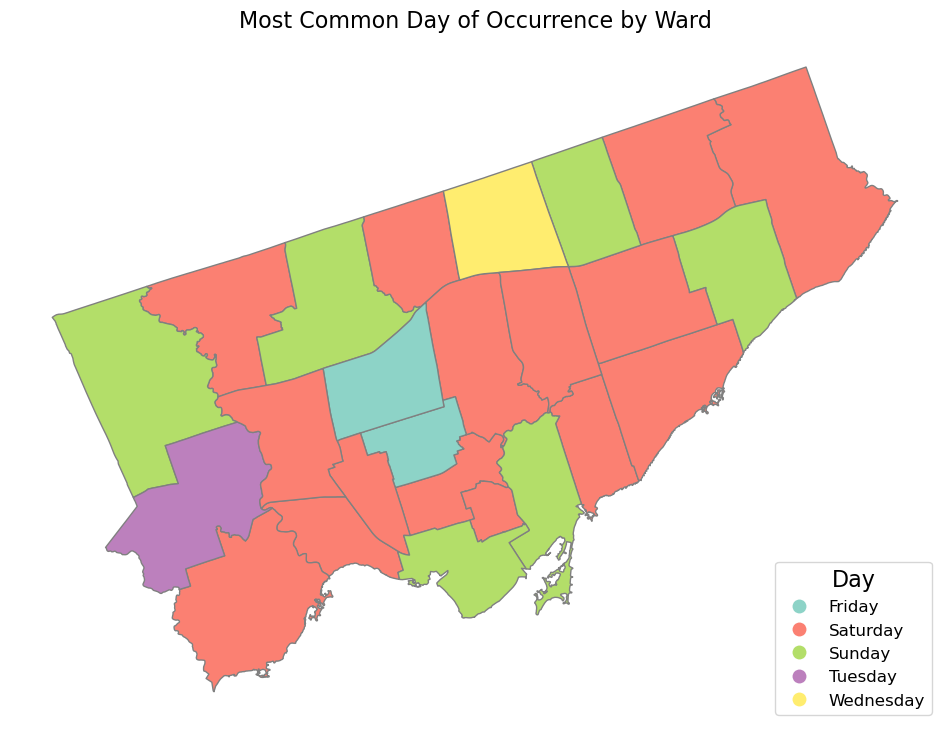

In [8]:
# create a plot to display the most common day for each ward
fig, axes = plt.subplots(1, 1, figsize = (12,12))

day.plot(column='OCC_DOW',cmap='Set3', edgecolor='grey', 
                  ax = axes, legend=True, 
                  legend_kwds={'loc': 4, 'title': 'Day', 
                               'title_fontsize': 16,'fontsize': 12})

axes.axis('off')
plt.title('Most Common Day of Occurrence by Ward', fontsize=16)
plt.show()

In [9]:
# make a copy of the original dataframe
time = crime.copy()

In [10]:
# def time_function(time_obs):
#     if isinstance(time_obs, int) and 0 <= time_obs <= 23:  # Check if it's an integer in the range 0-23
#         if 5 <= time_obs < 11:
#             return "Morning"
#         elif 12 <= time_obs < 17:
#             return "Daytime"
#         elif 18 <= time_obs < 22:
#             return "Evening"
#     return "NightTime"

# # Assuming 'OCC_HOUR' column contains hour values in the range 0-23
# time['Time_bin'] = time['OCC_HOUR'].apply(time_function)

# # Print the DataFrame with the new 'time_bin' column
# time

In [11]:
def time_function(time_obs):
    if isinstance(time_obs, int) and 0 <= time_obs <= 23:  # Check if it's an integer in the range 0-23
        if 22 <= time_obs < 23:
            return "Night1"
        elif 23 == time_obs:
            return "Night2"
        elif 0 == time_obs:
            return "12AM - 1AM"
        elif 1 == time_obs:
            return "Night4"
        elif 2 == time_obs:
            return "2AM - 3AM"
        elif 3 == time_obs:
            return "Night6"
        elif 4 == time_obs:
            return "Night7"
#     return "NightTime"

# Assuming 'OCC_HOUR' column contains hour values in the range 0-23
time['Time_bin'] = time['OCC_HOUR'].apply(time_function)

# Print the DataFrame with the new 'time_bin' column
time

,OBJECTID,EVENT_UNIQ,REPORT_DAT,OCC_DATE,REPORT_YEA,REPORT_MON,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOU,...,HOOD_140,NEIGHBOU_1,LONG_WGS84,LAT_WGS84,HOMICIDE_T,OCC_TIME_R,DEATH,INJURIES,geometry,Time_bin
0,1,GO-20141265238,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,0,...,98,Rosedale-Moore Park (98),-79.384206,43.670798,None,None,0,0,POINT (630259.812 4836578.641),12AM - 1AM
1,2,GO-20141259834,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,0,...,55,Thorncliffe Park (55),-79.345795,43.703684,None,None,0,0,POINT (633283.567 4840292.128),12AM - 1AM
2,3,GO-20141262027,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,10,...,77,Waterfront Communities-The Island (77),-79.379131,43.645981,None,None,0,0,POINT (630722.757 4833830.322),None
3,4,GO-20141259951,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3,...,76,Bay Street Corridor (76),-79.383200,43.654313,None,None,0,0,POINT (630376.574 4834749.275),12AM - 1AM
4,5,GO-20141261561,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,8,...,26,Downsview-Roding-CFB (26),-79.513797,43.719824,None,None,0,0,POINT (619714.947 4841828.297),None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227644,5946,GO-2023602110,None,2023-03-18,0,None,0,0,None,0,...,78,Kensington-Chinatown (78),-79.400593,43.647882,None,Night,0,0,POINT (628987.756 4834007.853),Night6
227645,5947,GO-20231811181,None,2023-08-04,0,None,0,0,None,0,...,69,Blake-Jones (69),-79.339432,43.680008,None,Night,0,0,POINT (633848.900 4837672.788),None
227646,5948,GO-20231873884,None,2023-08-11,0,None,0,0,None,0,...,111,Rockcliffe-Smythe (111),-79.481326,43.683512,None,Evening,0,2,POINT (622404.378 4837842.697),None
227647,5949,GO-20232284577,None,2023-09-30,0,None,0,0,None,0,...,136,West Hill (136),-79.186222,43.768403,None,Evening,0,0,POINT (645983.570 4847749.043),None


In [12]:
# find the number of times for each time bin
timecount = gpd.sjoin(time, wards, how='inner', op='within')

# bin by ward and reason for noise, and create count
time_counts = timecount.groupby(['AREA_NA13', 'Time_bin']).size().reset_index(name='count')
time_counts

C:\Users\Ryan Siu\.conda\envs\ggr375\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,AREA_NA13,Time_bin,count
0,Beaches-East York,12AM - 1AM,710
1,Beaches-East York,2AM - 3AM,293
2,Beaches-East York,Night1,532
3,Beaches-East York,Night2,471
4,Beaches-East York,Night4,365
...,...,...,...
170,York South-Weston,Night1,583
171,York South-Weston,Night2,555
172,York South-Weston,Night4,399
173,York South-Weston,Night6,279


In [13]:
# display the ward name with the most common time bin and its count
common_time = time_counts.sort_values(['AREA_NA13', 'count'], ascending=[True, False]).groupby('AREA_NA13').first().reset_index()
common_time

,AREA_NA13,Time_bin,count
0,Beaches-East York,12AM - 1AM,710
1,Davenport,12AM - 1AM,664
2,Don Valley East,12AM - 1AM,400
3,Don Valley North,12AM - 1AM,371
4,Don Valley West,12AM - 1AM,298
5,Eglinton-Lawrence,12AM - 1AM,373
6,Etobicoke Centre,12AM - 1AM,391
7,Etobicoke North,12AM - 1AM,729
8,Etobicoke-Lakeshore,12AM - 1AM,610
9,Humber River-Black Creek,12AM - 1AM,1041


In [14]:
# merge the count data into a new dataframe 
time_bin = pd.merge(wards, common_time, left_on='AREA_NA13', right_on='AREA_NA13', how='left')
time_bin

,_id1,AREA_ID2,DATE_EF3,DATE_EX4,AREA_AT5,AREA_TY6,PARENT_7,AREA_TY8,AREA_CL9,AREA_CL10,...,AREA_NA13,AREA_DE14,FEATURE15,FEATURE16,TRANS_I17,TRANS_I18,OBJECTI19,geometry,Time_bin,count
0,1,2457740.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993196.0,528.0,0.0,CITW,0.0,None,...,Humber River-Black Creek,Humber River-Black Creek (7),0,None,279754.0,-1.0,17344785,"POLYGON ((621458.592 4846712.482, 621544.221 4...",12AM - 1AM,1041
1,2,2457739.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993195.0,528.0,0.0,CITW,0.0,None,...,York Centre,York Centre (6),0,None,279754.0,-1.0,17344801,"POLYGON ((625533.338 4846776.345, 625573.375 4...",12AM - 1AM,643
2,3,2457738.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993194.0,528.0,0.0,CITW,0.0,None,...,Willowdale,Willowdale (18),0,None,279754.0,-1.0,17344817,"POLYGON ((629235.325 4846644.348, 629226.165 4...",12AM - 1AM,539
3,4,2457737.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993193.0,528.0,0.0,CITW,0.0,None,...,University-Rosedale,University-Rosedale (11),0,None,279754.0,-1.0,17344833,"POLYGON ((629747.036 4838758.081, 629746.876 4...",12AM - 1AM,742
4,5,2457736.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993192.0,528.0,0.0,CITW,0.0,None,...,Beaches-East York,Beaches-East York (19),0,None,279754.0,-1.0,17344849,"POLYGON ((637056.976 4841642.218, 637080.257 4...",12AM - 1AM,710
5,6,2457735.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993191.0,528.0,0.0,CITW,0.0,None,...,Scarborough Southwest,Scarborough Southwest (20),0,None,279754.0,-1.0,17344865,"POLYGON ((638736.626 4836846.147, 638635.957 4...",12AM - 1AM,978
6,7,2457734.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993190.0,528.0,0.0,CITW,0.0,None,...,Scarborough-Rouge Park,Scarborough-Rouge Park (25),0,None,279754.0,-1.0,17344881,"POLYGON ((647525.046 4856108.797, 647720.620 4...",12AM - 1AM,628
7,8,2457733.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993189.0,528.0,0.0,CITW,0.0,None,...,Scarborough North,Scarborough North (23),0,None,279754.0,-1.0,17344897,"POLYGON ((642619.920 4855587.637, 642648.266 4...",12AM - 1AM,420
8,9,2457732.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993188.0,528.0,0.0,CITW,0.0,None,...,Scarborough-Guildwood,Scarborough-Guildwood (24),0,None,279754.0,-1.0,17344913,"POLYGON ((646355.108 4846610.684, 646417.863 4...",12AM - 1AM,772
9,10,2457731.0,2018-08-07T18:11:06,3000-01-01T05:00:00,25993187.0,528.0,0.0,CITW,0.0,None,...,Scarborough Centre,Scarborough Centre (21),0,None,279754.0,-1.0,17344929,"POLYGON ((640832.743 4847664.300, 640873.726 4...",12AM - 1AM,686


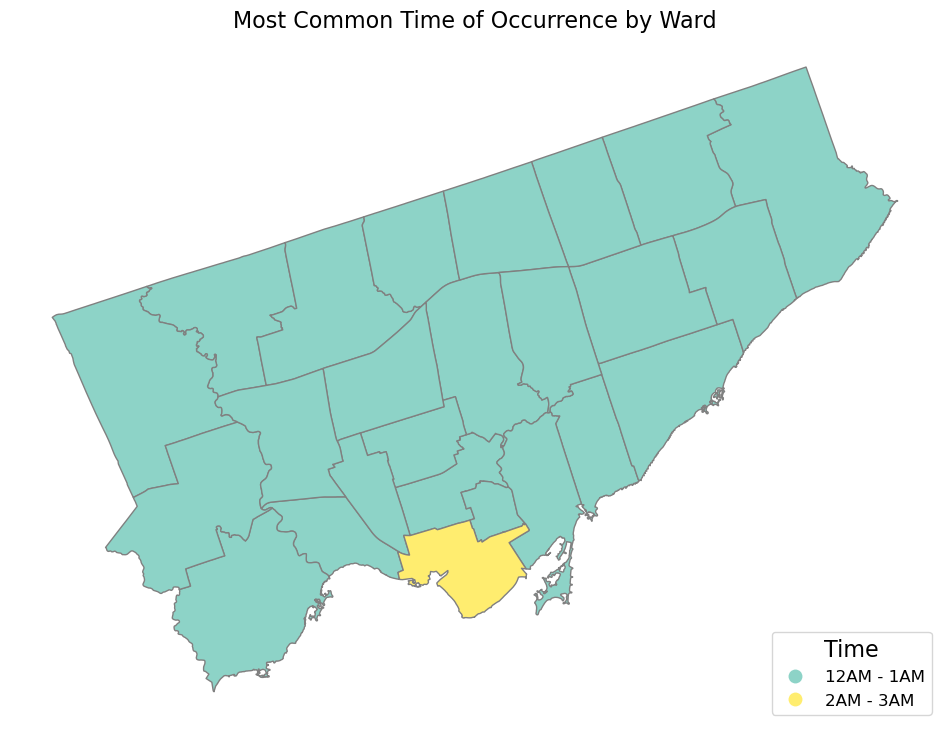

In [15]:
# create a plot to display the most common time for each ward
fig, axes = plt.subplots(1, 1, figsize = (12,12))

time_bin.plot(column='Time_bin',cmap='Set3', edgecolor='grey', 
                  ax = axes, legend=True, 
                  legend_kwds={'loc': 4, 'title': 'Time', 
                               'title_fontsize': 16,'fontsize': 12})

axes.axis('off')
plt.title('Most Common Time of Occurrence by Ward', fontsize=16)
plt.show()